In [75]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from pandas.plotting import lag_plot
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas import DataFrame
from pandas import concat

In [76]:
df=pd.read_csv("../input/hourly-energy-consumption/AEP_hourly.csv",index_col='Datetime',parse_dates=True)
df.head()

,AEP_MW
Datetime,
2004-12-31 01:00:00,13478.0
2004-12-31 02:00:00,12865.0
2004-12-31 03:00:00,12577.0
2004-12-31 04:00:00,12517.0
2004-12-31 05:00:00,12670.0


In [77]:
df.sort_values(by='Datetime', inplace=True)
print(df)

                      AEP_MW
Datetime                    
2004-10-01 01:00:00  12379.0
2004-10-01 02:00:00  11935.0
2004-10-01 03:00:00  11692.0
2004-10-01 04:00:00  11597.0
2004-10-01 05:00:00  11681.0
...                      ...
2018-08-02 20:00:00  17673.0
2018-08-02 21:00:00  17303.0
2018-08-02 22:00:00  17001.0
2018-08-02 23:00:00  15964.0
2018-08-03 00:00:00  14809.0

[121273 rows x 1 columns]


In [78]:
df.shape

(121273, 1)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 121273 entries, 2004-10-01 01:00:00 to 2018-08-03 00:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   AEP_MW  121273 non-null  float64
dtypes: float64(1)
memory usage: 1.9 MB


In [80]:
df.describe()

,AEP_MW
count,121273.000000
mean,15499.513717
std,2591.399065
min,9581.000000
25%,13630.000000
50%,15310.000000
75%,17200.000000
max,25695.000000


In [81]:
df.index = pd.to_datetime(df.index)

In [82]:
# Extract all Data Like Year MOnth Day Time etc
df["Month"] = df.index.month
df["Year"] = df.index.year
df["Date"] = df.index.date
df["Hour"] = df.index.hour
df["Week"] = df.index.week
df["Day"] = df.index.day_name()
df.head()

,AEP_MW,Month,Year,Date,Hour,Week,Day
Datetime,,,,,,,
2004-10-01 01:00:00,12379.0,10,2004,2004-10-01,1,40,Friday
2004-10-01 02:00:00,11935.0,10,2004,2004-10-01,2,40,Friday
2004-10-01 03:00:00,11692.0,10,2004,2004-10-01,3,40,Friday
2004-10-01 04:00:00,11597.0,10,2004,2004-10-01,4,40,Friday
2004-10-01 05:00:00,11681.0,10,2004,2004-10-01,5,40,Friday


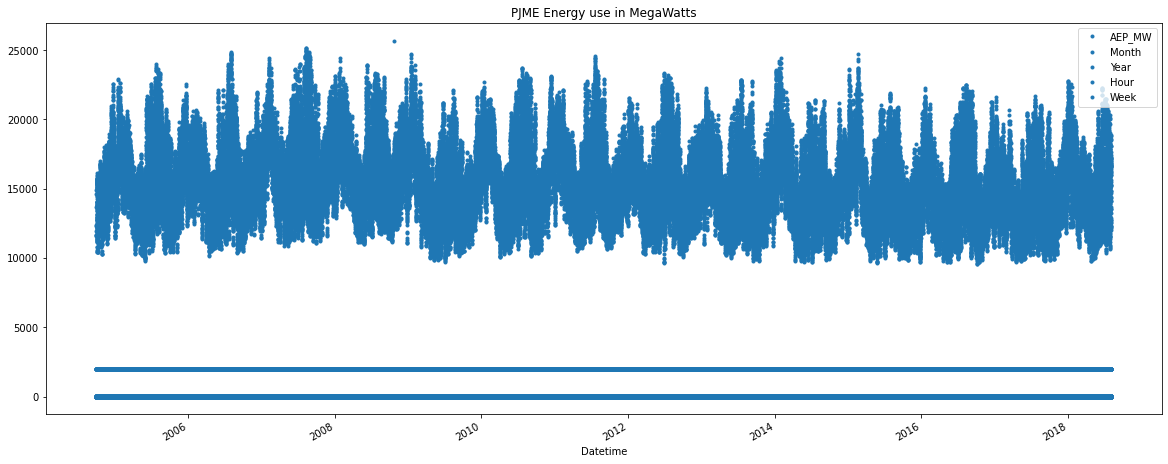

In [83]:
df.plot(title="PJME Energy use in MegaWatts", 
        figsize=(20, 8), 
        style=".", 
        color=sns.color_palette()[0])

plt.show()

In [84]:
df.tail()

,AEP_MW,Month,Year,Date,Hour,Week,Day
Datetime,,,,,,,
2018-08-02 20:00:00,17673.0,8,2018,2018-08-02,20,31,Thursday
2018-08-02 21:00:00,17303.0,8,2018,2018-08-02,21,31,Thursday
2018-08-02 22:00:00,17001.0,8,2018,2018-08-02,22,31,Thursday
2018-08-02 23:00:00,15964.0,8,2018,2018-08-02,23,31,Thursday
2018-08-03 00:00:00,14809.0,8,2018,2018-08-03,0,31,Friday


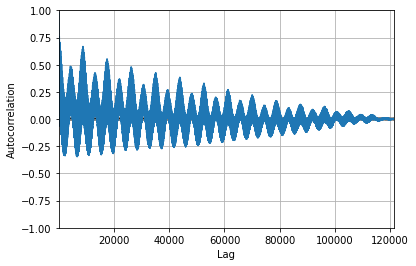

In [85]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['AEP_MW'])
plt.show()

In [86]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from sklearn.preprocessing import MinMaxScaler

# Analysis imports
from pandas.plotting import lag_plot
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas import DataFrame
from pandas import concat

# Modelling imports
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, GRU, RNN
from keras.layers import Dropout

In [87]:
values = DataFrame(df['AEP_MW'].values)
dataframe = concat([values.shift(1),values.shift(5),values.shift(10),values.shift(30), values], axis=1)
dataframe.columns = ['t', 't+1', 't+5', 't+10', 't+30']
result = dataframe.corr()
print(result)

             t       t+1       t+5      t+10      t+30
t     1.000000  0.731161  0.345667  0.501972  0.976223
t+1   0.731161  1.000000  0.630009  0.847210  0.630007
t+5   0.345667  0.630009  1.000000  0.644479  0.317277
t+10  0.501972  0.847210  0.644479  1.000000  0.408315
t+30  0.976223  0.630007  0.317277  0.408315  1.000000


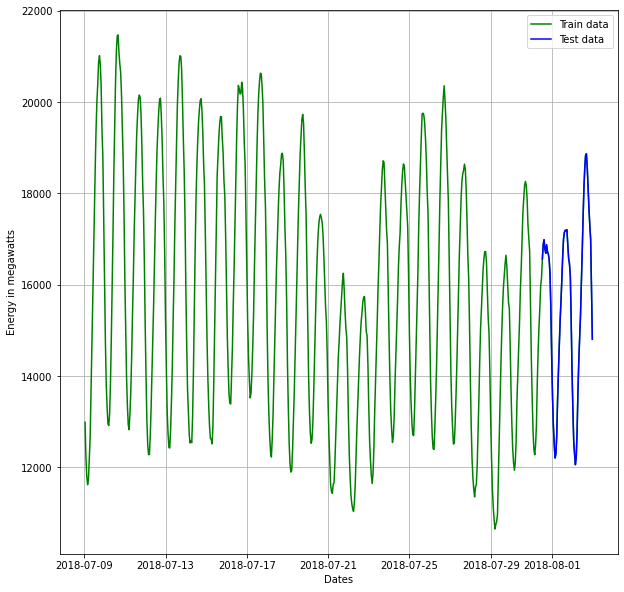

In [88]:
train_data, test_data = df[0:-60], df[-60:]
plt.figure(figsize=(10,10))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Energy in megawatts')
plt.plot(df['AEP_MW'].tail(600), 'green', label='Train data')
plt.plot(test_data['AEP_MW'], 'blue', label='Test data')
plt.legend()

MSE: 3700885.0406027567
MAE: 1667.1805899362046
RMSE: 1923.768447761517


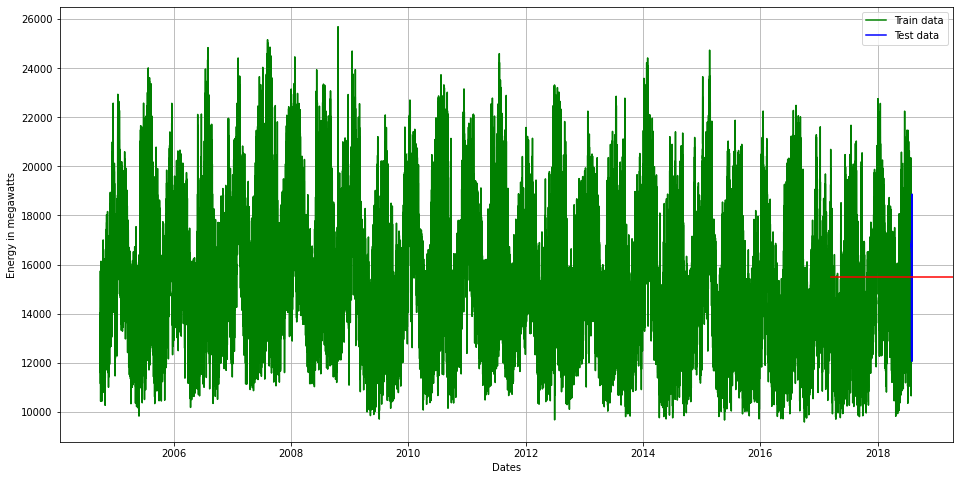

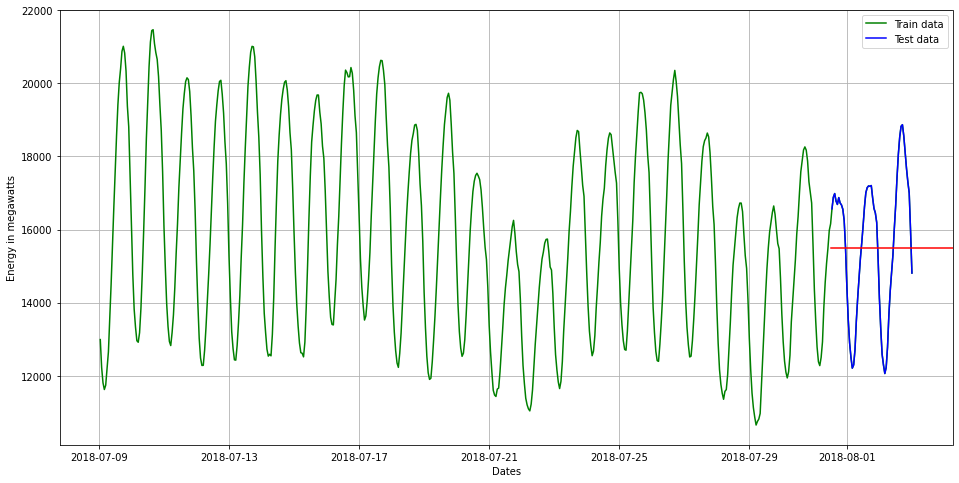

In [89]:
mean_value = df['AEP_MW'].mean() # calculation of mean price

plt.figure(figsize=(16,8))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Energy in megawatts')
plt.plot(df['AEP_MW'], 'green', label='Train data')
plt.plot(test_data['AEP_MW'], 'blue', label='Test data')
plt.axhline(y=mean_value, xmin=0.864, xmax=1, color='red')
plt.legend()

plt.figure(figsize=(16,8))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Energy in megawatts')
plt.plot(df['AEP_MW'].tail(600), 'green', label='Train data')
plt.plot(test_data['AEP_MW'], 'blue', label='Test data')
plt.axhline(y=mean_value, xmin=0.864, xmax=1, color='red')
plt.legend()

print('MSE: '+str(mean_squared_error(test_data['AEP_MW'], np.full(len(test_data), mean_value))))
print('MAE: '+str(mean_absolute_error(test_data['AEP_MW'], np.full(len(test_data), mean_value))))
print('RMSE: '+str(sqrt(mean_squared_error(test_data['AEP_MW'], np.full(len(test_data), mean_value)))))

In [90]:
from statsmodels.tsa.stattools import adfuller


def adf_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)

In [91]:
adf_test(df['AEP_MW'])

1. ADF :  -18.285883882257217
2. P-Value :  2.3029539101747796e-30
3. Num Of Lags :  71
4. Num Of Observations Used For ADF Regression: 121201
5. Critical Values :
	 1% :  -3.430403955318047
	 5% :  -2.8615638474512295
	 10% :  -2.566782693155802


In [92]:
import statsmodels.api as sm

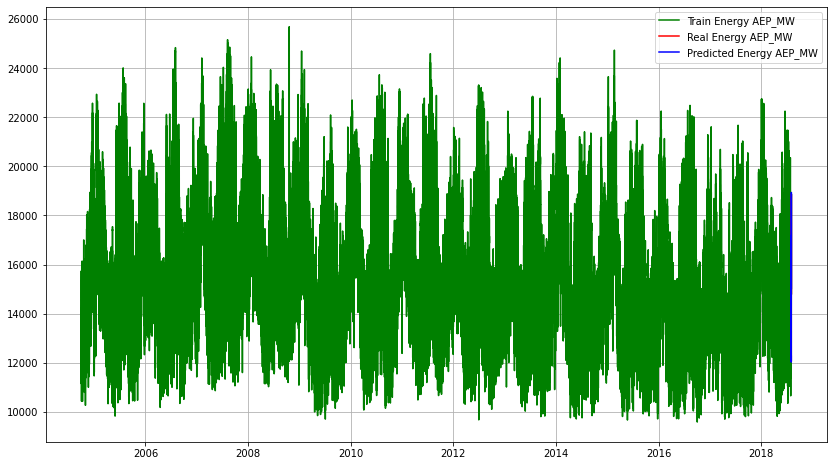

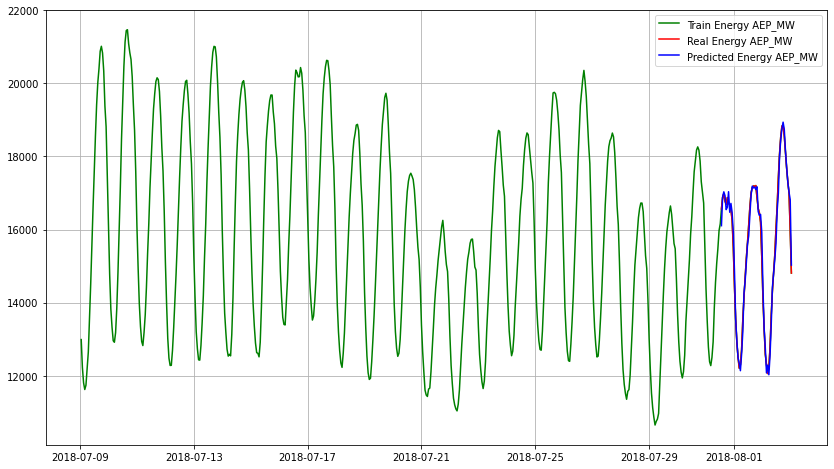

MSE: 57710.45153428949
MAE: 177.320844006739
RMSE: 240.2299971574938


In [93]:
#Train Arima Model
train_arima = train_data['AEP_MW']
test_arima = test_data['AEP_MW']

history = [x for x in train_arima]
y = test_arima
# make first prediction
predictions = list()
model = sm.tsa.arima.ARIMA(history, order=(5,1,0))
model_fit = model.fit()
yhat = model_fit.forecast()[0]
predictions.append(yhat)
history.append(y[0])
# rolling forecasts
for i in range(1, len(y)):
    # predict
    model = sm.tsa.arima.ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    # invert transformed prediction
    predictions.append(yhat)
    # observation
    obs = y[i]
    history.append(obs)
    
plt.figure(figsize=(14,8))
plt.plot(df.index, df['AEP_MW'], color='green', label = 'Train Energy AEP_MW')
plt.plot(test_data.index, y, color = 'red', label = 'Real Energy AEP_MW')
plt.plot(test_data.index, predictions, color = 'blue', label = 'Predicted Energy AEP_MW')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(14,8))
plt.plot(df.index[-600:], df['AEP_MW'].tail(600), color='green', label = 'Train Energy AEP_MW')
plt.plot(test_data.index, y, color = 'red', label = 'Real Energy AEP_MW')
plt.plot(test_data.index, predictions, color = 'blue', label = 'Predicted Energy AEP_MW')
plt.legend()
plt.grid(True)
plt.show()

print('MSE: '+str(mean_squared_error(y, predictions)))
print('MAE: '+str(mean_absolute_error(y, predictions)))
print('RMSE: '+str(sqrt(mean_squared_error(y, predictions))))